In [30]:
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
%matplotlib inline
plt.rc('figure', figsize=(20.0, 10.0))

In [44]:
hashrate = read_csv("bitcoin_hashrate.csv", parse_dates=True, index_col="Date")
hashrate.columns = ["hashrate"]
price = read_csv("bitcoin_price.csv", parse_dates=True, index_col="Date")
price.columns = ["price"]
difficulty = read_csv("bitcoin_difficulty.csv", parse_dates=True, index_col="Date")
difficulty.columns = ["difficulty"]

data = pd.concat([hashrate, price, difficulty], axis=1)

In [50]:
data = data['2014-01-01':]

In [45]:
def rewardPerBlock(date):
    if date in pd.date_range('2011-01-01', '2012-11-28'):
        return 50
    if date in pd.date_range('2012-11-28', '2016-07-09'):
        return 25
    return 12.5

data["reward"] = data.index.map(rewardPerBlock)

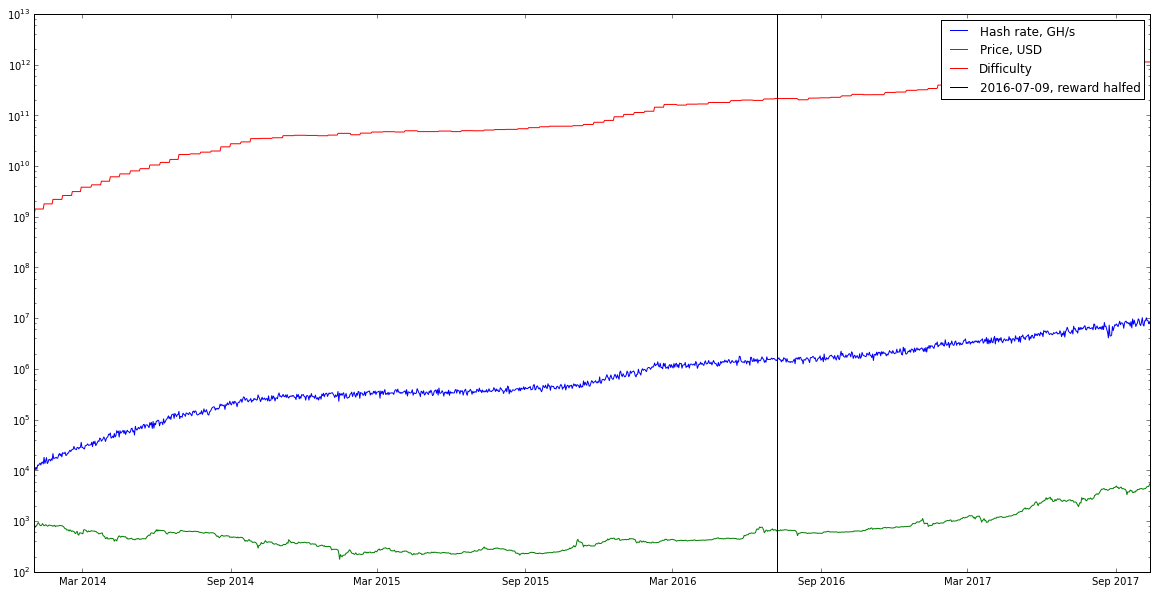

In [63]:
ax = plt.axes()
ax.set_yscale("log")
plt.plot_date(data.index, data["hashrate"], '-', label="Hash rate, GH/s")
plt.plot_date(data.index, data["price"], '-', label="Price, USD")
plt.plot_date(data.index, data["difficulty"], '-', label="Difficulty")
plt.axvline(x=pd.to_datetime('2016-07-09'), color='0', label="2016-07-09, reward halfed")
plt.legend()

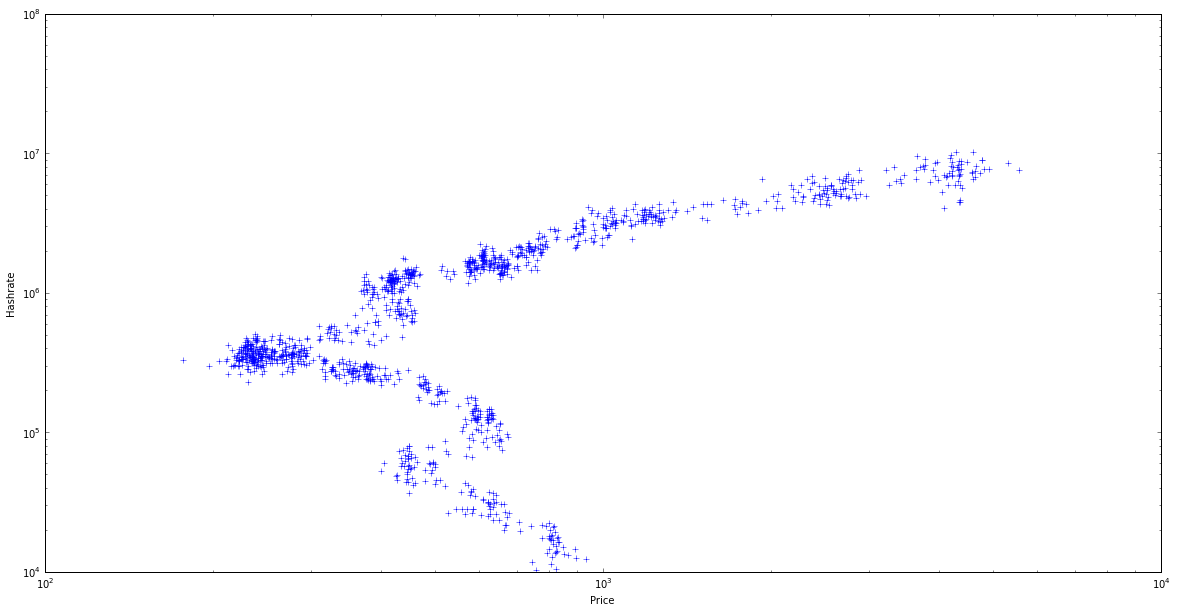

In [35]:
ax = plt.axes()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Price")
ax.set_ylabel("Hashrate")
plt.plot(data["price"], data["hashrate"], '+')

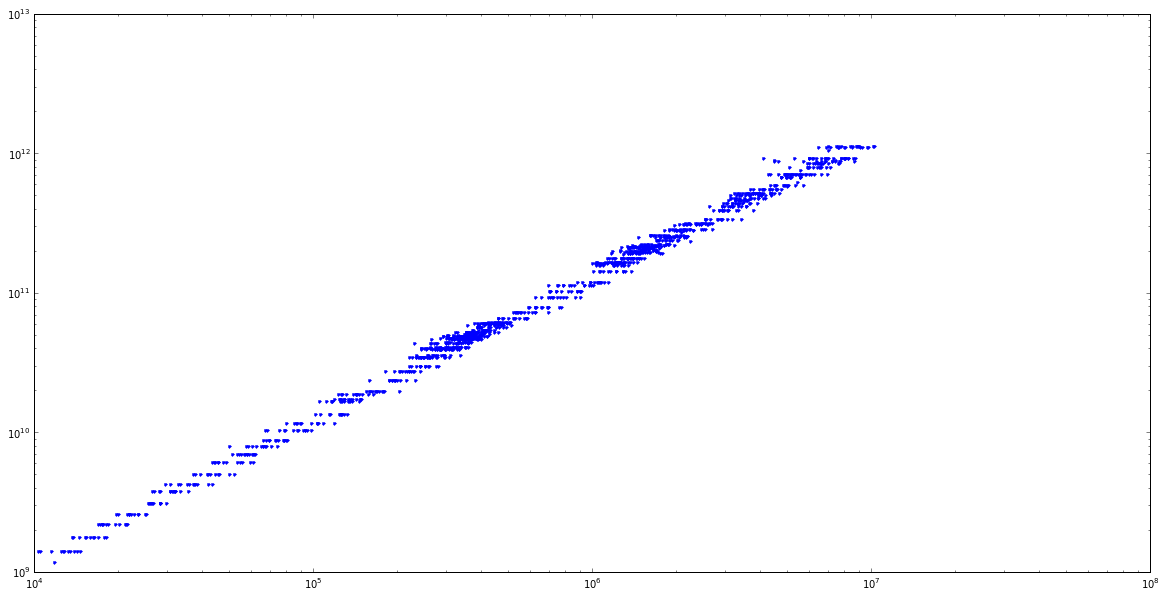

In [36]:
ax = plt.axes()
ax.set_yscale("log")
ax.set_xscale("log")
plt.plot(data["hashrate"], data["difficulty"], '.')

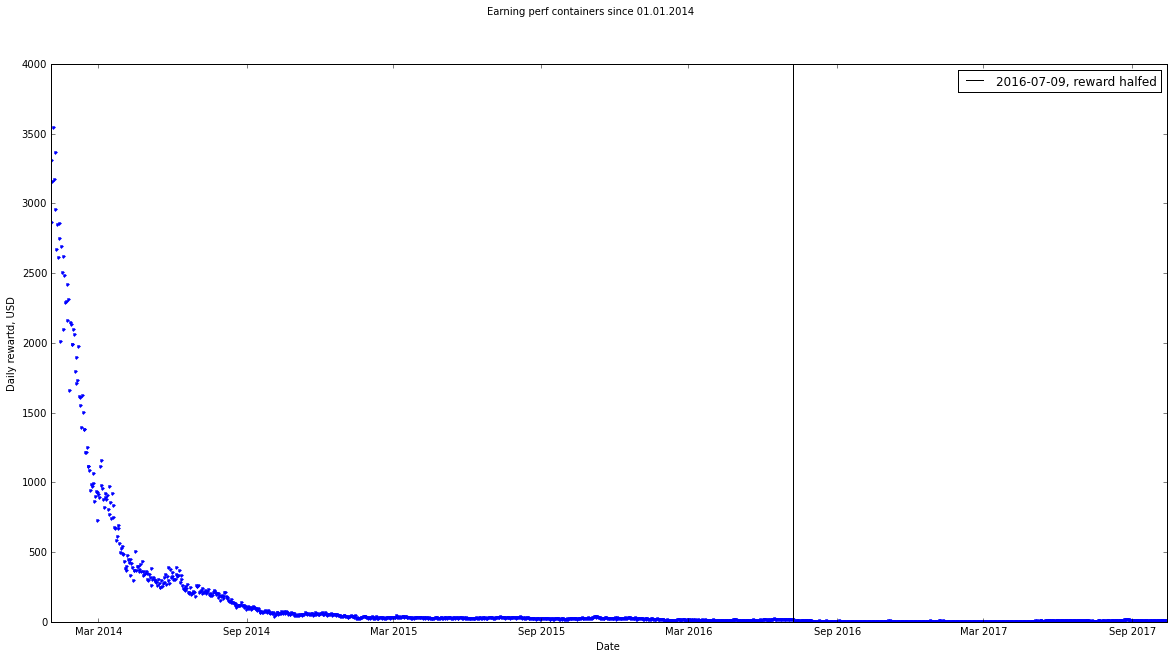

In [67]:
reward_per_gigahash_per_block = data["price"]*data["reward"]/(data['hashrate'] * 60 * 10)
reward_per_container = reward_per_gigahash_per_block * 7500 # bitfury 7.5 PH/s
blocks_per_day = 144
ax = plt.axes()
ax.set_ylabel("Daily rewartd, USD")
ax.set_xlabel("Date")
plt.plot(data.index, reward_per_container * blocks_per_day, '.')
plt.axvline(x=pd.to_datetime('2016-07-09'), color='0', label="2016-07-09, reward halfed")
plt.legend()
plt.suptitle("Earning perf containers since 01.01.2014")

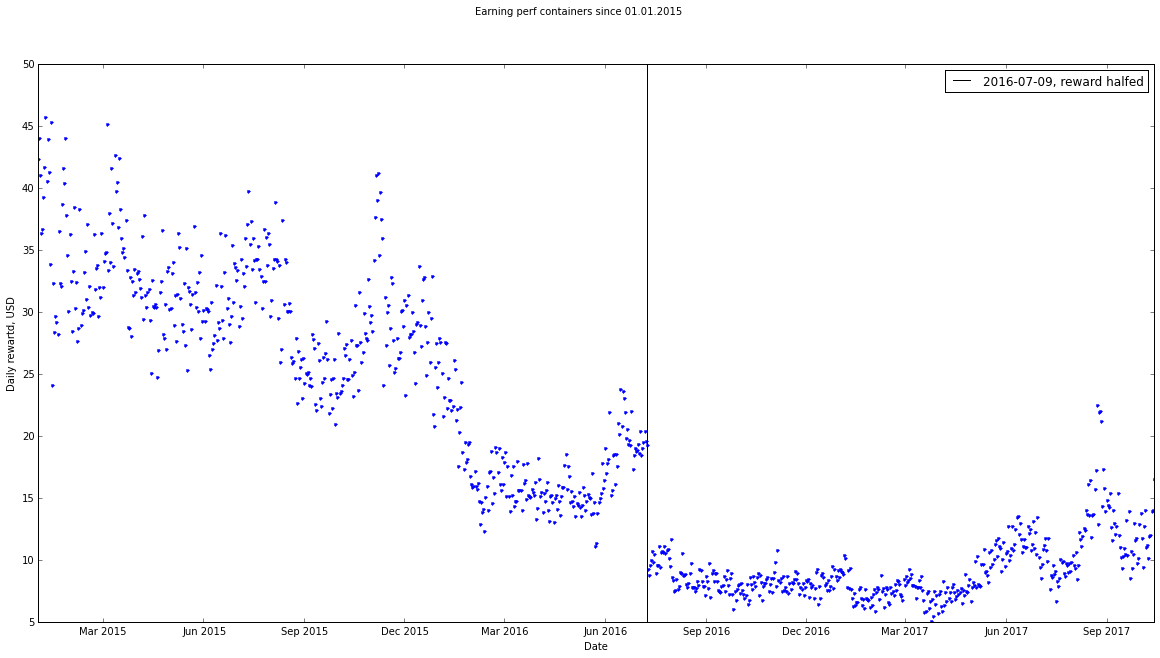

In [70]:
data = data['2015-01-01':]
reward_per_gigahash_per_block = data["price"]*data["reward"]/(data['hashrate'] * 60 * 10)
reward_per_container = reward_per_gigahash_per_block * 7500 # bitfury 7.5 PH/s
blocks_per_day = 144
ax = plt.axes()
ax.set_ylabel("Daily rewartd, USD")
ax.set_xlabel("Date")
plt.plot(data.index, reward_per_container * blocks_per_day, '.')
plt.axvline(x=pd.to_datetime('2016-07-09'), color='0', label="2016-07-09, reward halfed")
plt.legend()
plt.suptitle("Earning perf containers since 01.01.2015")